In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv('C:/linearX.csv')
print(dfx)

     9.1
0    8.0
1    9.1
2    8.4
3    6.9
4    7.7
..   ...
94   7.8
95  10.2
96   6.1
97   7.3
98   7.3

[99 rows x 1 columns]


In [3]:
dfy=pd.read_csv('C:/linearY.csv')
print(dfy)

    0.99523
0   0.99007
1   0.99769
2   0.99386
3   0.99508
4   0.99630
..      ...
94  0.99620
95  0.99760
96  0.99464
97  0.99830
98  0.99670

[99 rows x 1 columns]


In [4]:
print(dfx.shape)
print(dfy.shape)

(99, 1)
(99, 1)


In [5]:
#converting the dataset into linear numpy array.
dfx=dfx.values
dfy=dfy.values
x=dfx.reshape((-1,))
y=dfy.reshape((-1,))
print(x.shape,y.shape)
print(x)
print(y)

(99,) (99,)
[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]
[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.99387 

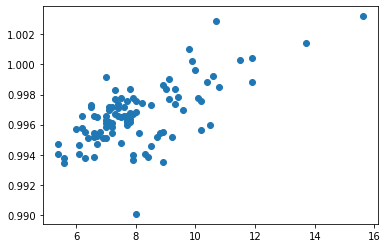

In [6]:
#plotting
plt.scatter(x,y)
plt.show()

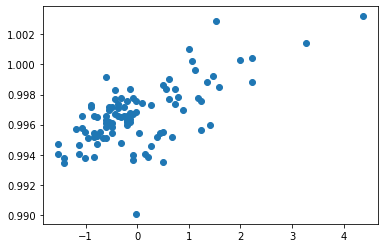

In [7]:
#Normalization-> Shift the dataset to origin
#Normalizing values of x only as y is already normalized.
x=(x-x.mean())/x.std()
y=y
plt.scatter(x,y)
plt.show()

In [8]:
#Gradient Descent Algorithm -> 
#START WITH A RANDOM THETA
#REPEAT UNTIL CONVERGE
#UPDATE THETA ACCORDING TO THE RULE.

In [9]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [10]:
def error (x,y,theta):
    error=0
    for i in range(x.shape[0]):
        hx= hypothesis(x[i],theta)
        error +=(hx-y[i])**2
    return error

In [11]:
def gradient(x,y,theta):
    grad=np.zeros((2,))
    for i in range (x.shape[0]):
        hx=hypothesis(x[i],theta)
        grad[0] += (hx-y[i])
        grad[1] += (hx-y[i])*x[i]       
    return grad

In [12]:
def gradientdescent(x,y,learningrate=0.001):
    theta=np.array([-2.0,0.0])
    max_iteration=100
    itr=0
    
    error_list=[]
    theta_list=[]
    while(itr<max_iteration):
        grad=gradient(x,y,theta)
        err=error(x,y,theta)
        error_list.append(err)
        theta_list.append(theta)
        theta[0] -= learningrate*grad[0]
        theta[1] -= learningrate*grad[1]
        itr +=1
    return theta,error_list,theta_list

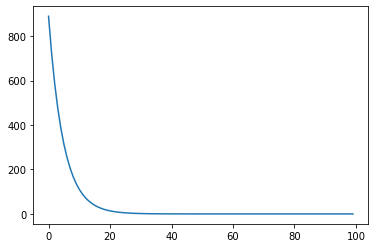

In [13]:
    final_theta, error_list, theta_list=gradientdescent(x,y,0.001)
    plt.plot(error_list)
    plt.show()

In [14]:
xtest=np.linspace(-2,6,10) #testing data
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


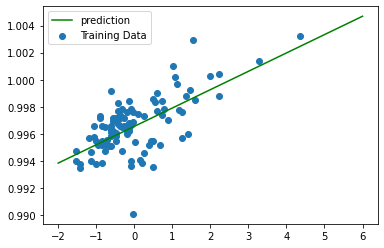

In [16]:
plt.scatter(x,y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='green',label='prediction')
plt.legend()
plt.show()

In [17]:
##################END################